# <a id='toc1_'></a>[이상값(Outlier)](#toc0_)
---

**Table of contents**<a id='toc0_'></a>    
- [이상값(Outlier)](#toc1_)    
  - [이상값 판별](#toc1_1_)    
    - [ESD](#toc1_1_1_)    
    - [4분위수 이용](#toc1_1_2_)    
      - [① 박스 플롯을 이용한 이상값 검출](#toc1_1_2_1_)    
      - [② IQR 함수를 이용한 이상값 검출](#toc1_1_2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---

## <a id='toc1_1_'></a>[이상값 판별](#toc0_)

### <a id='toc1_1_1_'></a>[ESD](#toc0_)

$$\mu- 3\alpha < X < \mu +3\alpha \iff |\frac{X - \mu}{\sigma} | < 3$$

$$(X: 관측값 \quad \mu : 평균 \quad \sigma: 표준편차)$$

In [1]:
def esd(x):
    return abs((x - x.mean()) / x.std()) < 3

In [2]:
import pandas as pd

df = pd.DataFrame({
    'score': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10000000], 
    'name': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
})

In [3]:
result = esd(df['score'])   # score의 이상값 판별

print(result)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
Name: score, dtype: bool


In [4]:
print(df[result])   # True로 반환되는 행만 필터링하여 출력

    score name
0       1    A
1       1    B
2       1    C
3       1    D
4       1    E
5       1    F
6       1    G
7       1    H
8       1    I
9       1    J
10      1    K


In [5]:
# 또는 다음과 같이 한꺼번에 출력할 수도 있다.
print(df[esd(df['score'])])

    score name
0       1    A
1       1    B
2       1    C
3       1    D
4       1    E
5       1    F
6       1    G
7       1    H
8       1    I
9       1    J
10      1    K


### <a id='toc1_1_2_'></a>[4분위수 이용](#toc0_)

#### <a id='toc1_1_2_1_'></a>[① 박스 플롯을 이용한 이상값 검출](#toc0_)

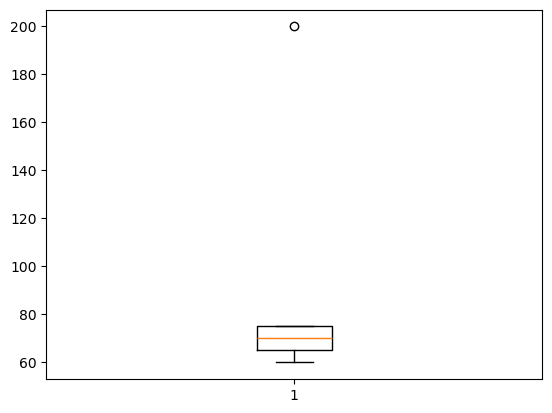

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'score': [65, 60, 70, 75, 200],
                    'name': ["Bell", "Cherry", "Don", "Jake", "Fox"]})

box_score = plt.boxplot(df['score'])   # score 열에 대해 boxplot 수행

minimum = box_score['whiskers'][0].get_ydata()[1]         # 최소값
q1 = box_score['boxes'][0].get_ydata()[1]                 # Q1
q2 = box_score['medians'][0].get_ydata()[0]               # Q2
q3 = box_score['boxes'][0].get_ydata()[2]                 # Q3
maximum = box_score['whiskers'][1].get_ydata()[1]         # 최대값

outliers = []
for point in df['score']:
    if point < minimum or point > maximum:    # 최소값 미만 또는 최대값 초과일 경우 이상값 처리
        outliers.append(point)

In [7]:
print("최솟값:", minimum)
print("1사분위:", q1)
print("2사분위(중앙값):", q2)
print("3사분위:", q3)
print("최댓값:", maximum)
print("이상값", outliers)


최솟값: 60.0
1사분위: 65.0
2사분위(중앙값): 70.0
3사분위: 75.0
최댓값: 75.0
이상값 [200]


- 함수로 만들어보기

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# 4분위수 함수
def get_outliers_with_boxplot(target):
    box_score = plt.boxplot(target)

    minimum = box_score['whiskers'][0].get_ydata()[1]
    q1 = box_score['boxes'][0].get_ydata()[1]
    q2 = box_score['medians'][0].get_ydata()[0]
    q3 = box_score['boxes'][0].get_ydata()[2]
    maximum = box_score['whiskers'][1].get_ydata()[1]

    outliers = []
    
    for item in target:
        if item < minimum or item > maximum:
            outliers.append(item)
    
    return outliers

[200]


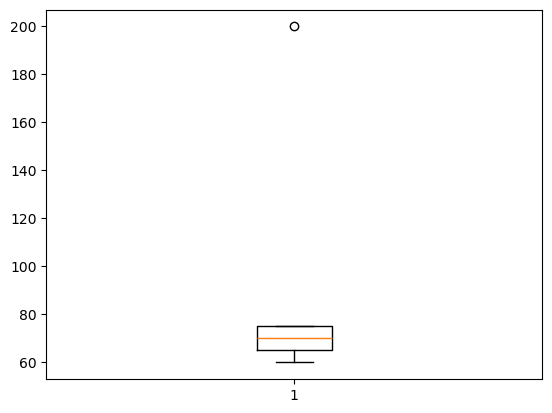

In [9]:
df = pd.DataFrame({'score': [65, 60, 70, 75, 200],
                    'name': ["Bell", "Cherry", "Don", "Jake", "Fox"]})
target = df['score']
ourliers = get_outliers_with_boxplot(target)

print(outliers)

#### <a id='toc1_1_2_2_'></a>[② IQR 함수를 이용한 이상값 검출](#toc0_)

$$ IQR = Q_3 - Q_1 \\ Q_1 - 1.5 \times IQR < data < Q_3 + 1.5 \times IQR $$

In [10]:
import pandas as pd
from scipy.stats import iqr

df = pd.DataFrame({'score': [65, 60, 70, 75, 200],
                    'name': ["Bell", "Cherry", "Don", "Jake", "Fox"]})

min_score = df['score'].median() - 2 * iqr(df['score'])  # 중위수 - 2*IQR
max_score = df['score'].median() + 2 * iqr(df['score'])  # 중위수 + 2*IQR

result = df[(df['score'] >= min_score) & (df['score'] <= max_score)]
print(result)

   score    name
0     65    Bell
1     60  Cherry
2     70     Don
3     75    Jake
